## Mapas de litofacies con Python¶
En este tutorial realizaremos un mapa de porcentaje de calizas utilizando las funciones de Python para interpolar entre puntos espaciados irregularmente (coordenadas  $x$  e  $y$ ) para luego graficar lineas de igual porcentaje de carbonatos ($z$). Los pasos se describen como comentarios en el script.

In [1]:
#Cargamos las librerias necesarias.

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd

#Luego cargamos los datos desde un archivo guardado como cvs (comma separated values).

data=pd.read_csv('/home/fergomez/Dropbox/Estrati/Datos_mapa_porcentaje_caliza-xyz.csv', header=None)

In [2]:
#Extraemos del conjunto de datos los datos de coordenadas x e y, y espesores (z). 

x=data[0]
y=data[1]
z=data[2]

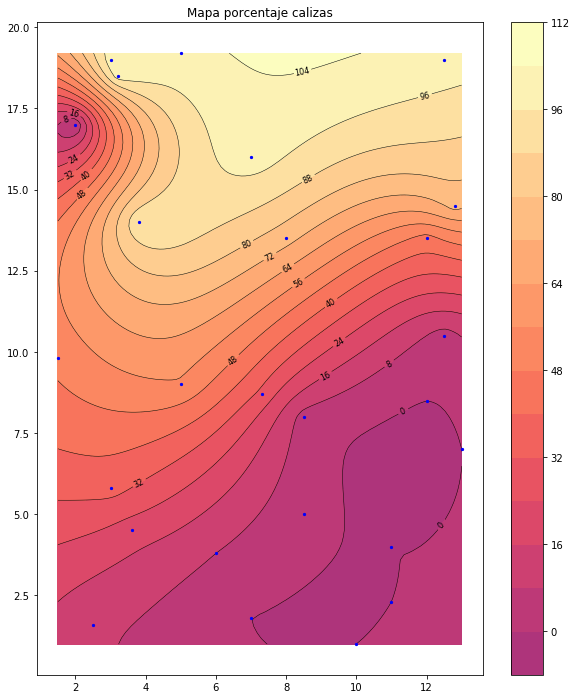

In [4]:
# Generamos una grilla regular de puntos para interpolar.
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Realizamos la interpolacion (lineal) mediante scipy.interpolate.Rbf
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

# Ploteamos los datos (lineas isopacas, "contour" y "filled contour")
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.clabel(CS, inline=True, fontsize=8, fmt = '%1.0f')
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.magma,
                 vmax=abs(zi).max(), vmin=-abs(zi).max())

plt.colorbar()  # Esto plotea la barra de colores de escala

plt.scatter(x, y, marker='o', c='b', s=5, zorder=10) #plotea ubicacion de puntos x e y
plt.rcParams["figure.figsize"]=[10.0,12]
plt.title('Mapa porcentaje calizas')

#Eliminar el numeral (#) en la linea siguiente en caso de queres guardar el plot como pdf
#plt.savefig('Mapa_isopaco_Python_jet_colour', format='pdf', dpi=300)

plt.show() #para mostrar el grafico
#variantes de escalas de colores pueden verse aqui:
#https://matplotlib.org/users/colormaps.html